In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('C:/Users/A30010587/Downloads/cwp_interview/cwp_interview/'))
if module_path not in sys.path:
    sys.path.append(module_path)


import torch
import numpy as np
from typing import Optional, Dict, Any
import torch
import torch.nn as nn
from utils import TimeseriesDataset, NormalizationIdentity, NormalizationStandardization, _split_series_time_dims, _merge_series_time_dims, _easy_mlp, device
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cvxpy as cp
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("Question2.csv", index_col=0, header=[0,1], parse_dates=True)

Data Import

In [2]:
da = data["da"]
rt = data["rt"]
X = data["X"]

# example of prices with a two day lag if you wish to use timeseries as features (ie RNN, CNN, ARIMA, etc...)
shifted_da = da.shift(freq="48H")
shifted_rt = rt.shift(freq="48H")

split = datetime(2020,8,1)

X_train = X.loc[:split]
X_validate = X.loc[split:]

da_train = da.loc[:split]
da_validate = da.loc[split:]

rt_train = rt.loc[:split]
rt_validate = rt.loc[split:]

print('\nVerify NaN values')
print('X_train',X_train.isnull().values.any())
print('Nan index in X_train',X_train.isnull().values.any(1).nonzero()[0])
X_train.fillna(X_train.median(), inplace = True)
print('X_train',X_train.isnull().values.any())
print('X_validate',X_validate.isnull().values.any())
print('da_train',da_train.isnull().values.any())
print('da_validate',da_validate.isnull().values.any())
print('rt_train',rt_train.isnull().values.any())
print('rt_validate',rt_validate.isnull().values.any())



Verify NaN values
X_train True
Nan index in X_train [10468]
X_train False
X_validate False
da_train False
da_validate False
rt_train False
rt_validate False


RNN decoder

In [3]:
from Model import TradingBot
from QuantileDecoder import QuantileDecoder, AttentionalQuantile
from utils import hourly_results, worst_loss
def create_model(gamma:float, l_norm:int):
    net = TradingBot(
        num_series=100,
        input_dim = 4,
        gamma = gamma,
        l_norm = l_norm,
        data_normalization="standardization",
        loss_normalization="series",
        rnn_decoder={
            "dim_hidden_features":2,
            "num_layers":2,#32,
            "dim_output":168 #predict one day ahead for the next week 24*7
        },
        # series_embedding_dim=2,
        # input_encoder_layers=3,
        # input_encoding_normalization=True,
    )
    return net.to(device)

TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


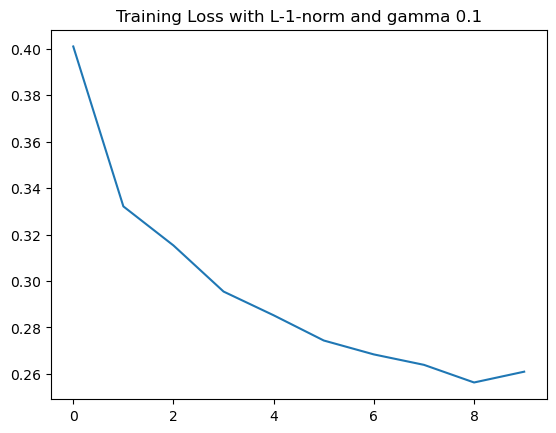

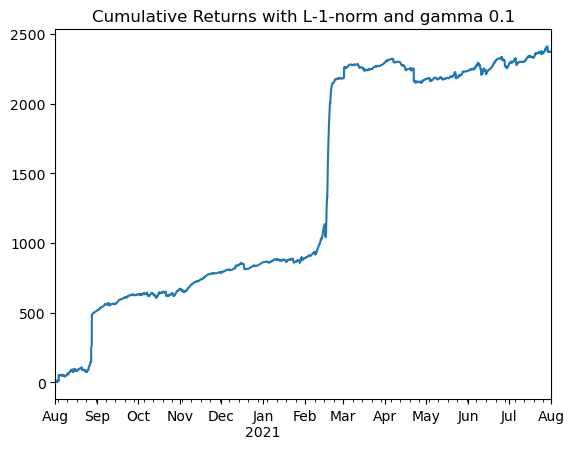

Portfolio returns 1661.5480000000007
constraint -60.414
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


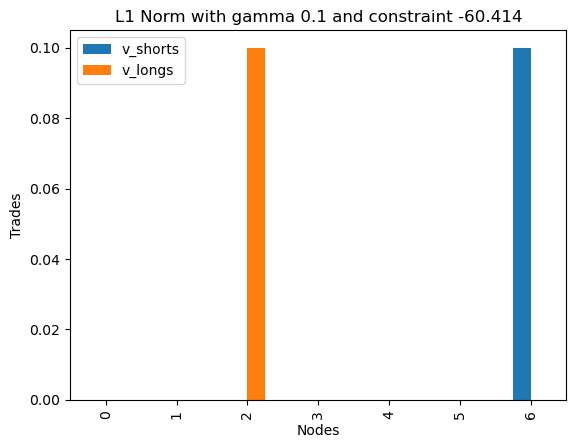

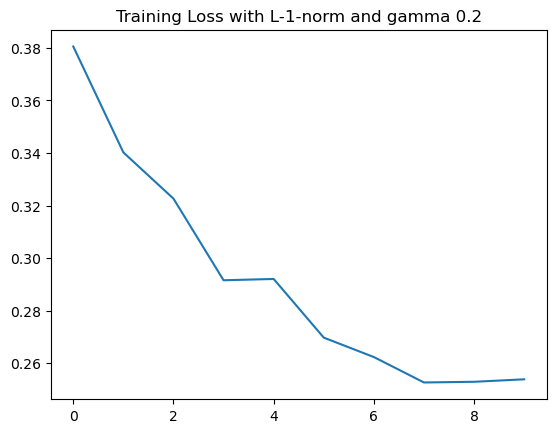

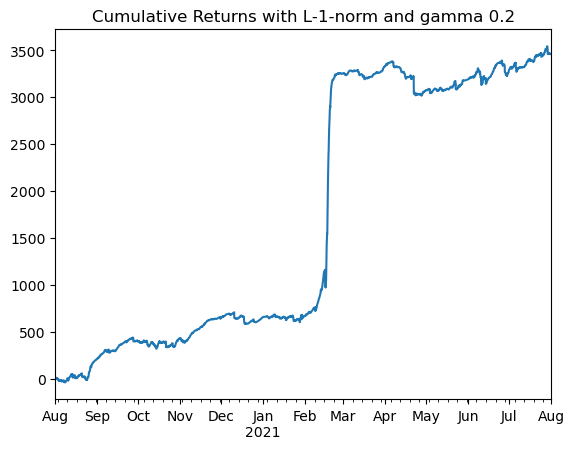

Portfolio returns 2552.016000000001
constraint -120.828
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.60s/it]


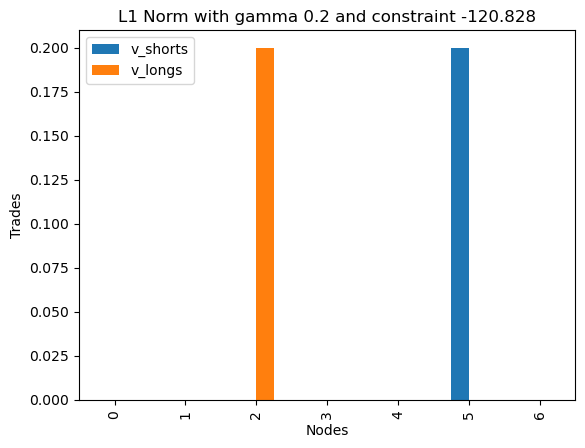

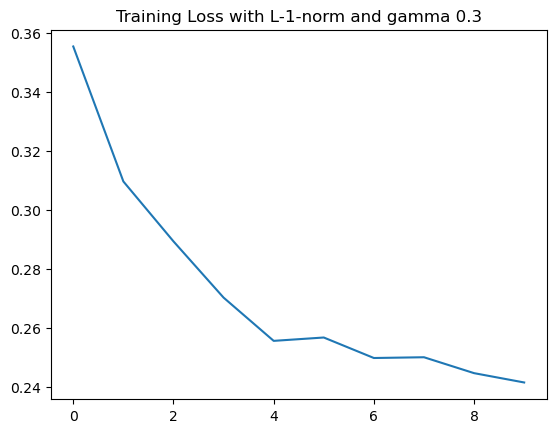

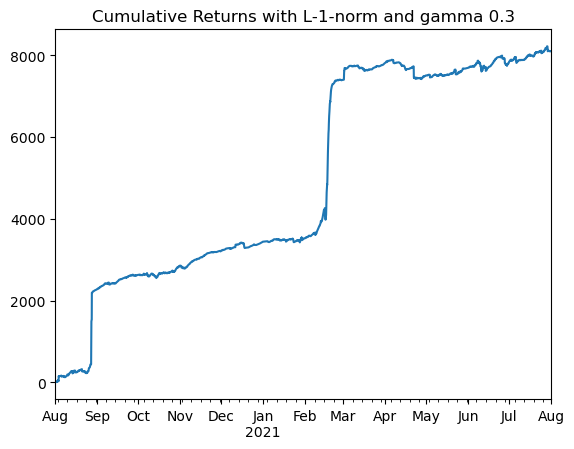

Portfolio returns 5825.535000000001
constraint -181.242
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


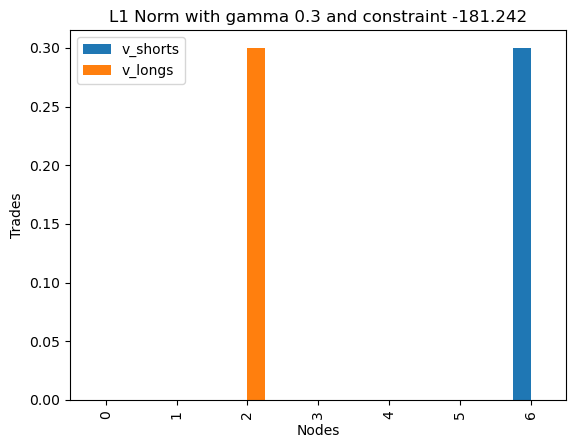

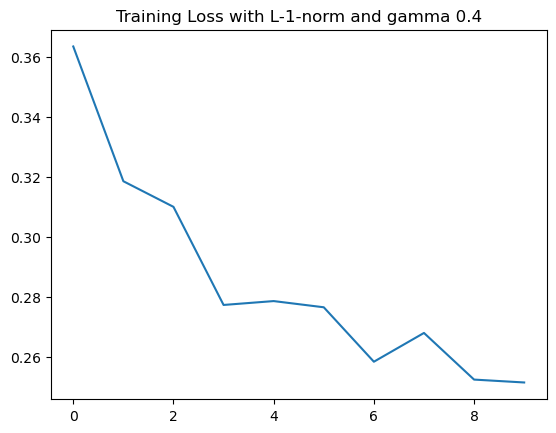

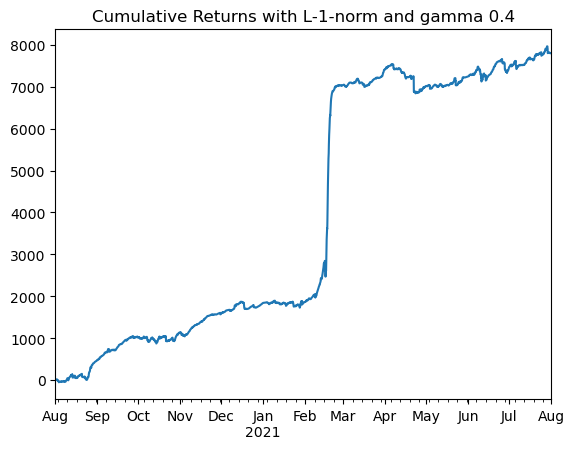

Portfolio returns 6195.336000000001
constraint -241.656
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.63s/it]


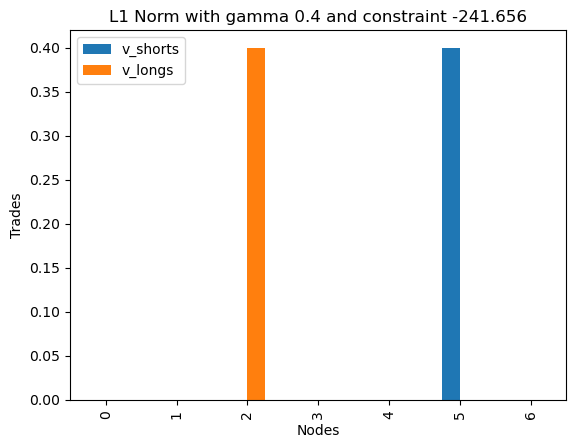

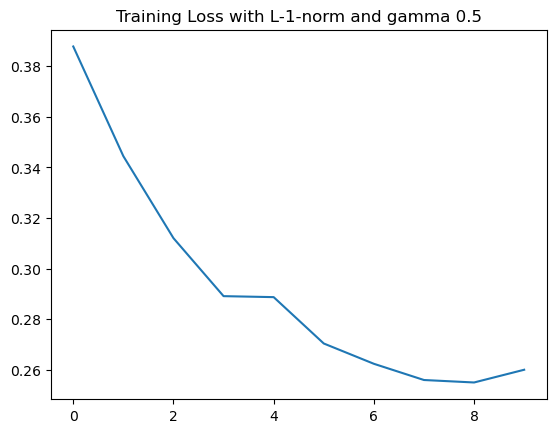

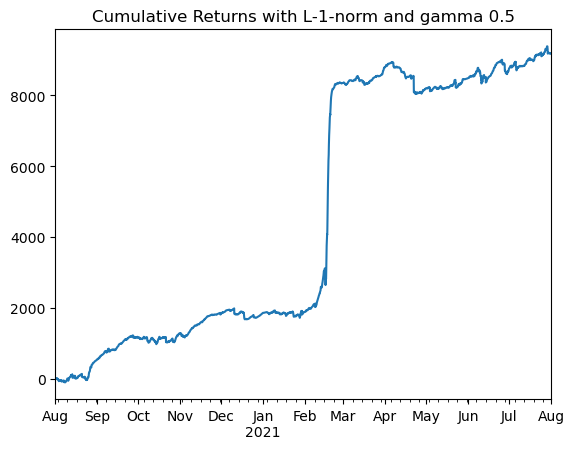

Portfolio returns 7446.325000000002
constraint -302.07
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


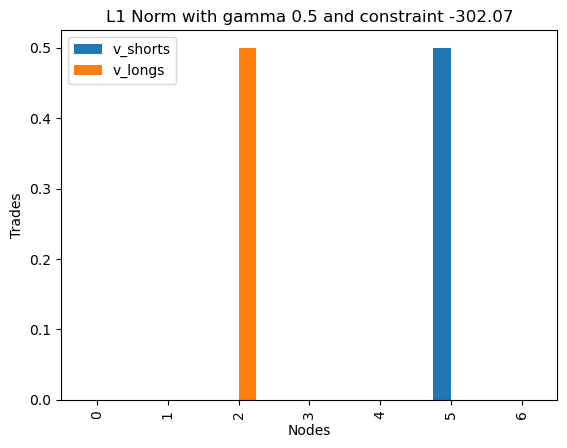

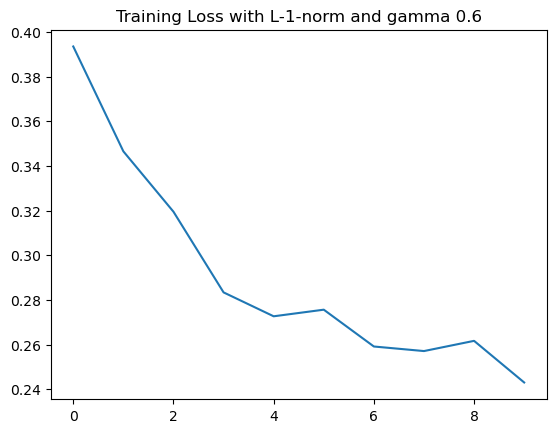

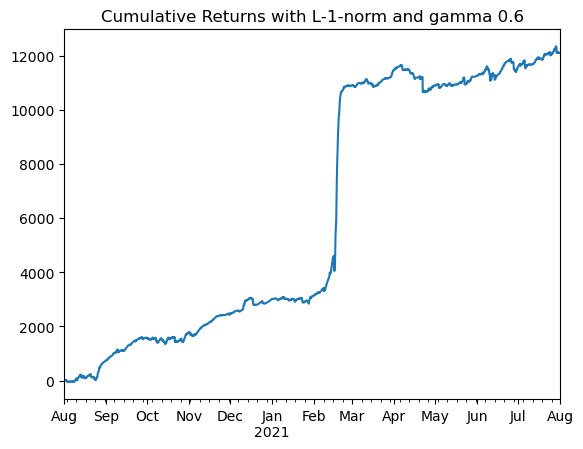

Portfolio returns 9374.856
constraint -362.484
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.64s/it]


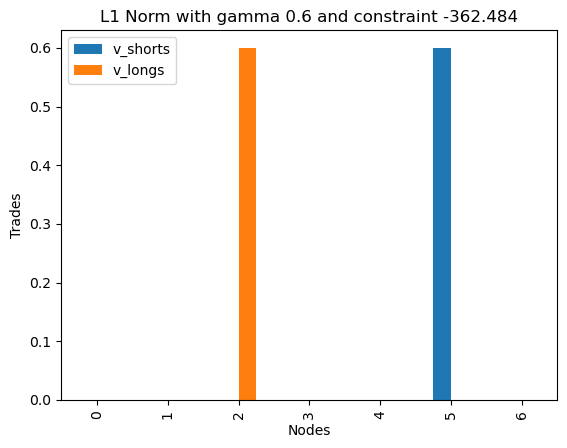

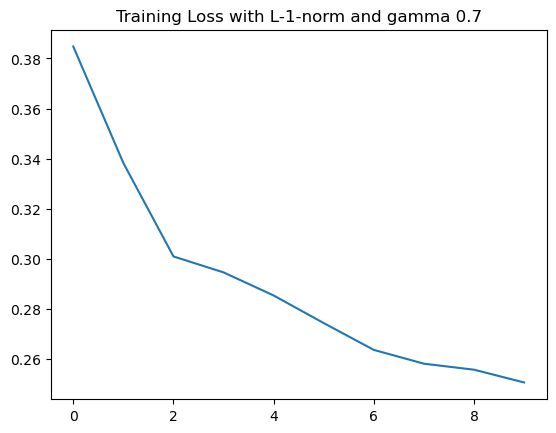

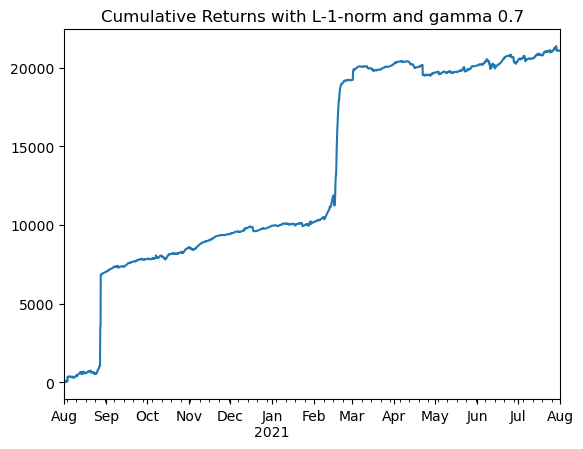

Portfolio returns 14947.883999999996
constraint -422.89799999999997
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


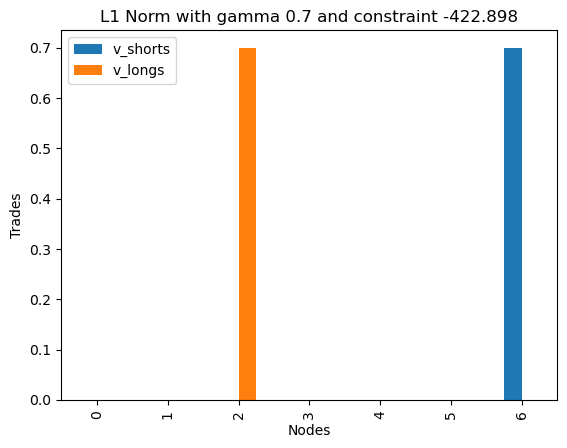

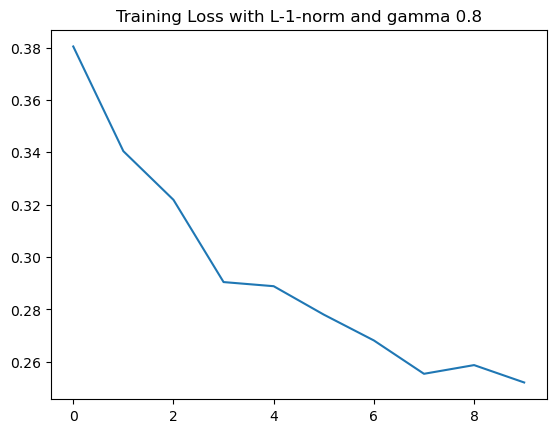

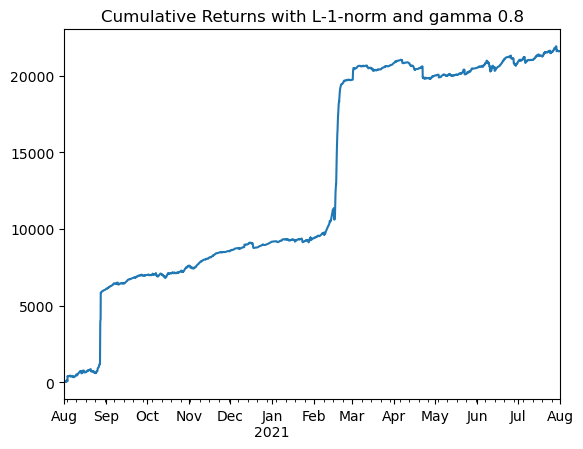

Portfolio returns 15568.135999999999
constraint -483.312
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


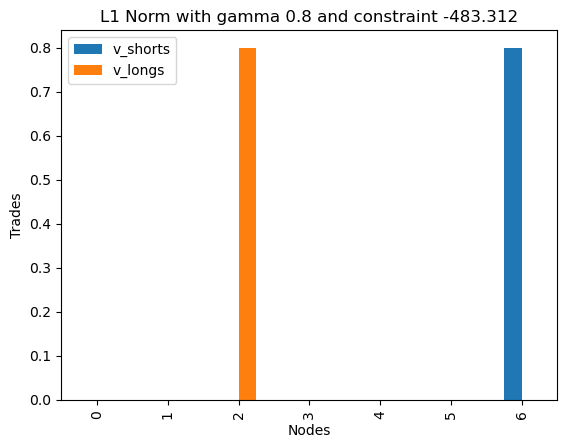

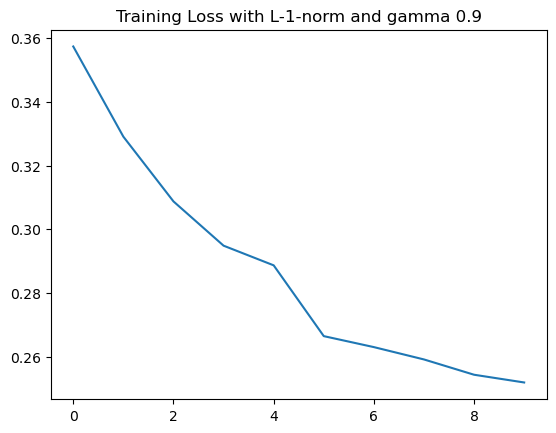

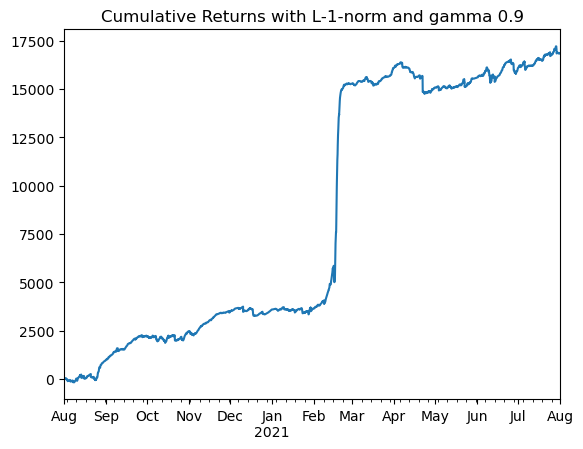

Portfolio returns 13433.931000000002
constraint -543.726
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


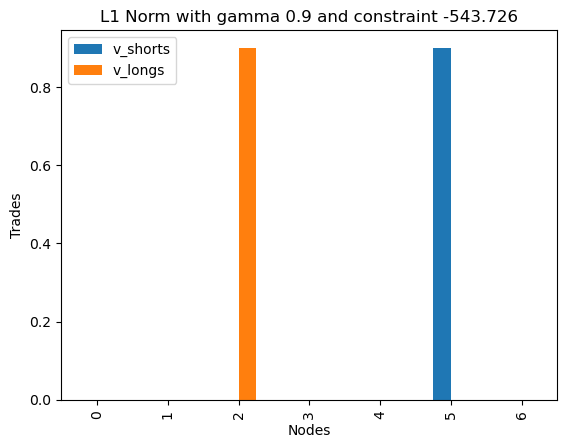

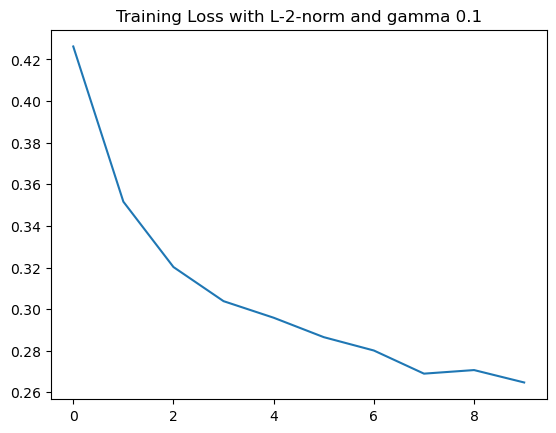

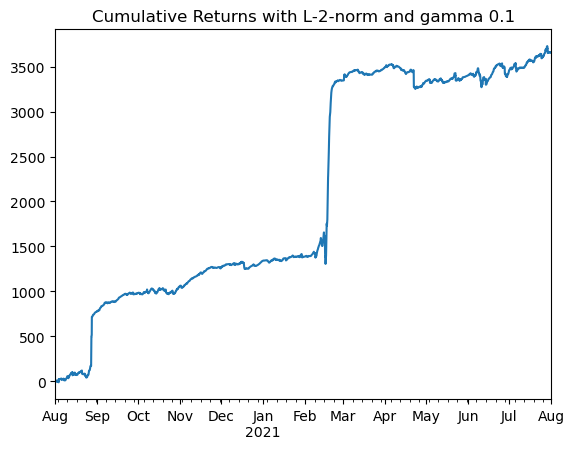

Portfolio returns 2722.448833
constraint -121.96992300000001
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.64s/it]


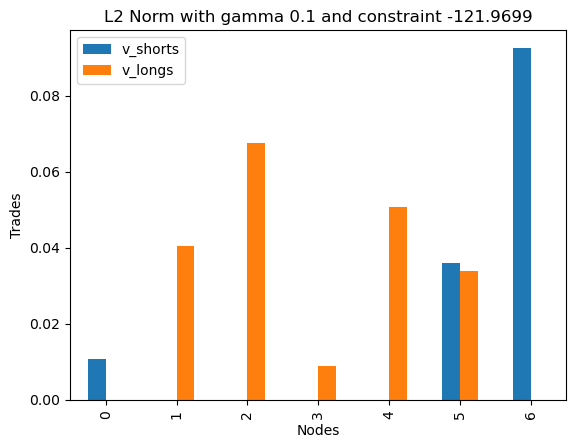

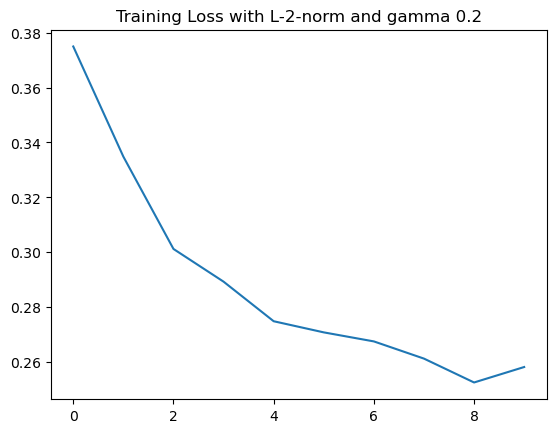

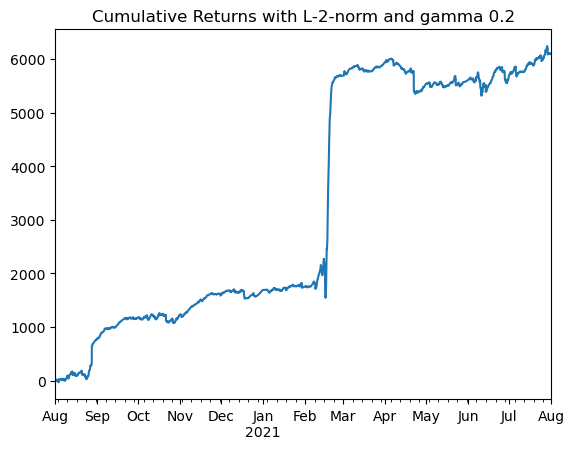

Portfolio returns 4769.485992
constraint -243.08045099999998
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.60s/it]


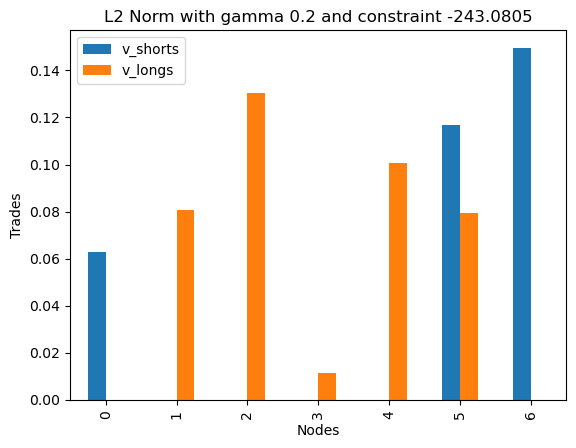

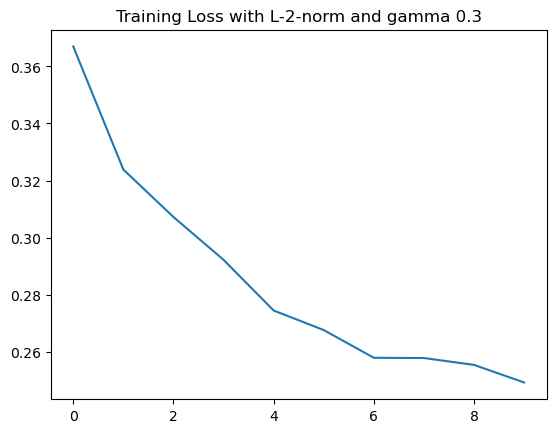

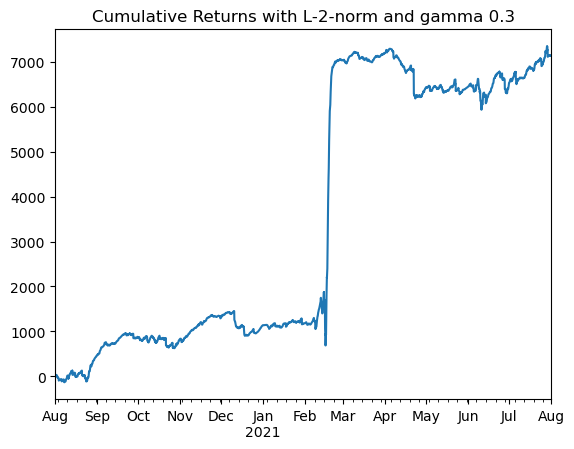

Portfolio returns 6164.170010999999
constraint -359.364504
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.63s/it]


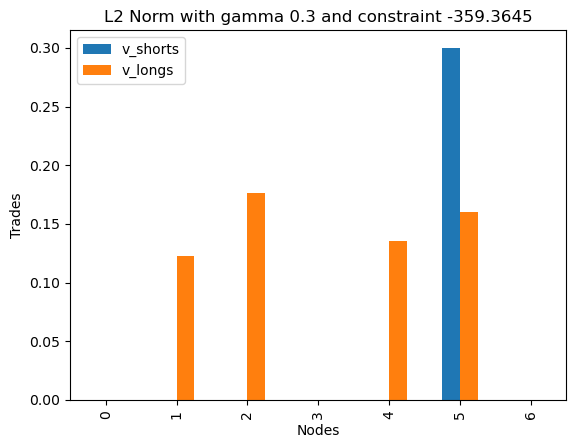

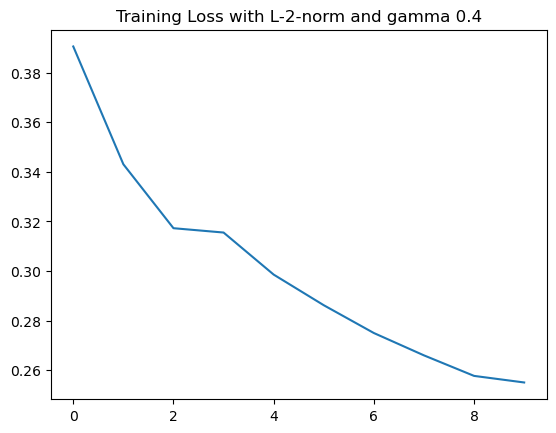

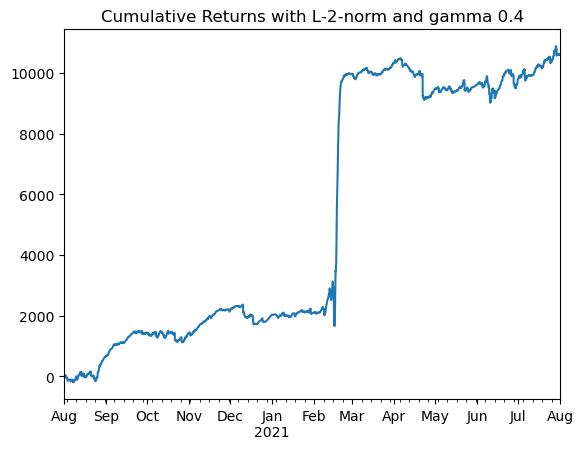

Portfolio returns 9039.179008
constraint -487.5662259999999
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:15<00:00,  1.60s/it]


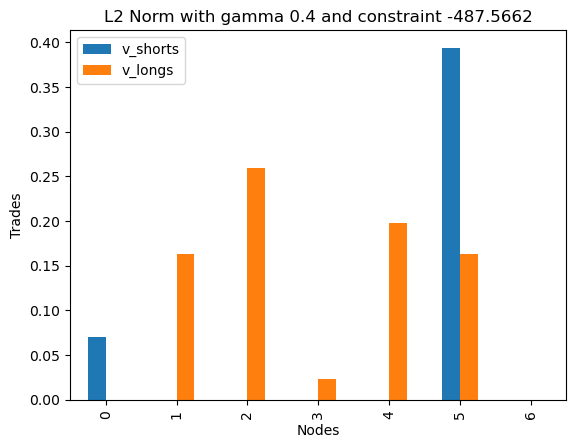

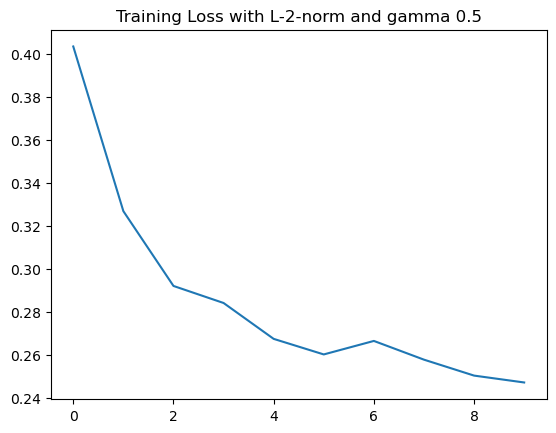

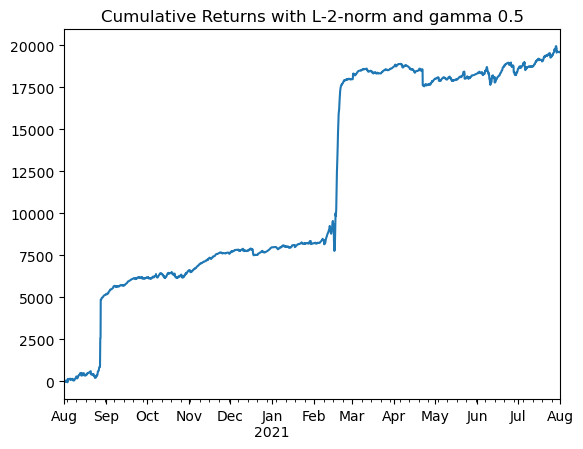

Portfolio returns 14614.523414
constraint -615.877336
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


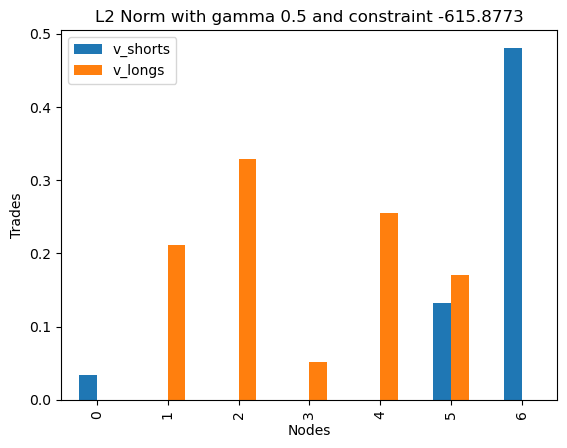

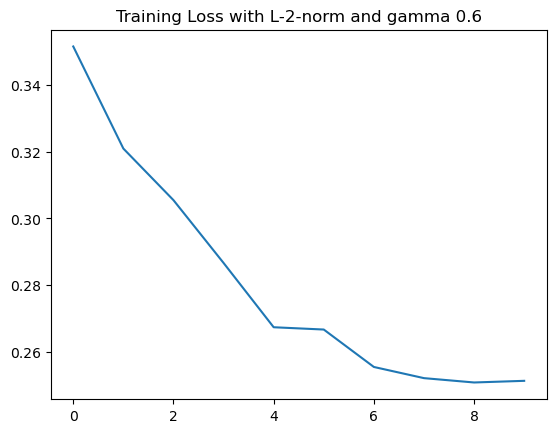

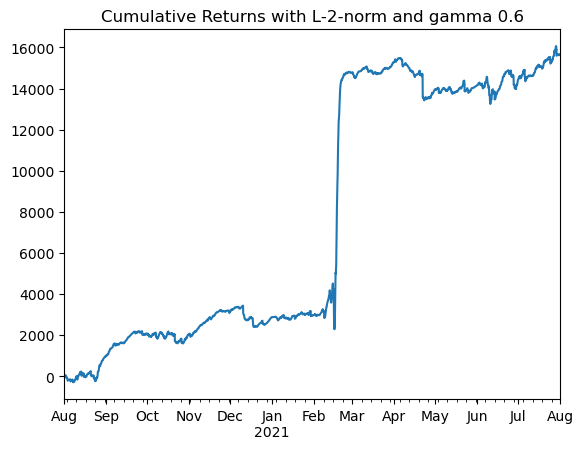

Portfolio returns 13673.727632000002
constraint -733.892213
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.61s/it]


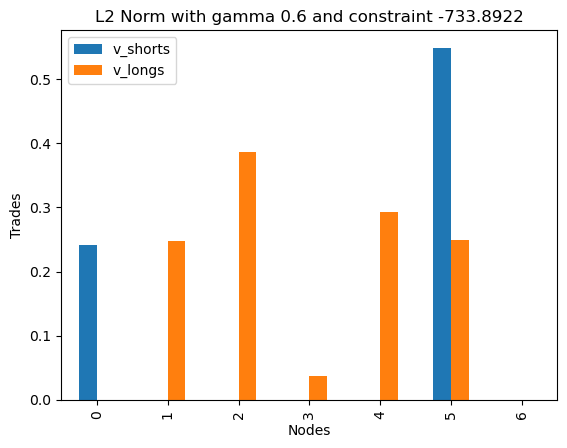

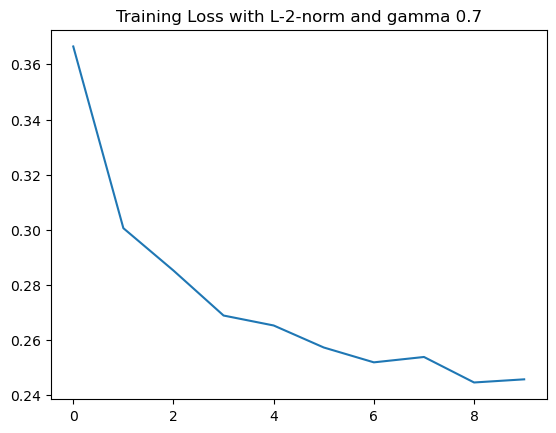

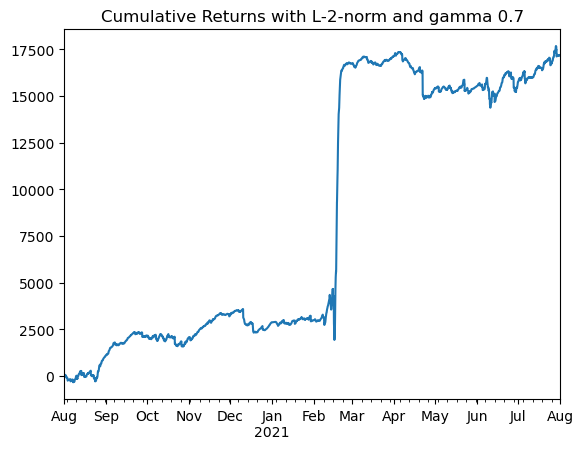

Portfolio returns 15503.572978999997
constraint -847.8835459999999
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


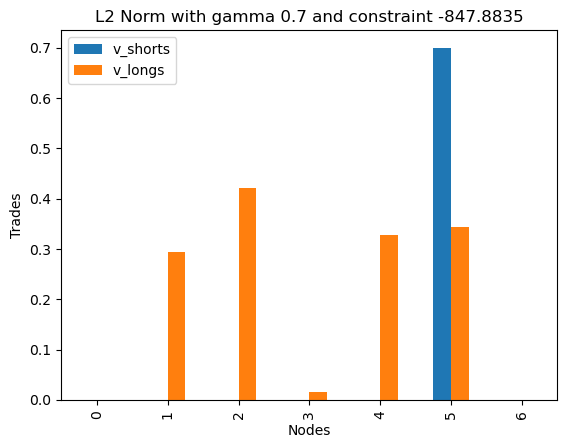

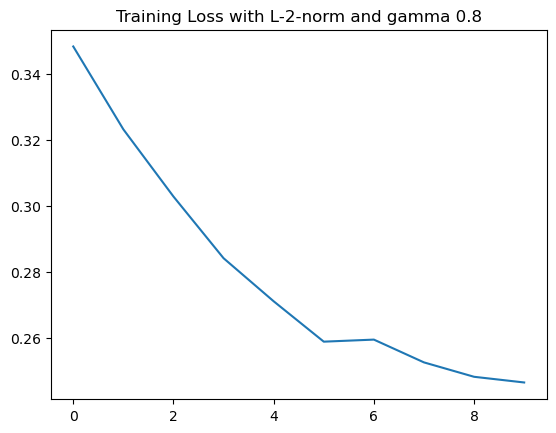

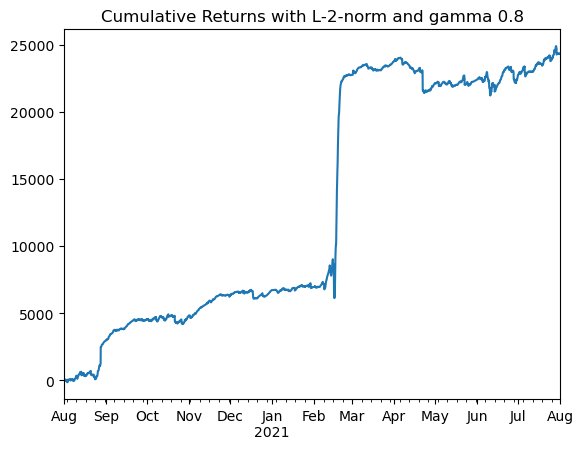

Portfolio returns 18814.541193
constraint -963.2725389999999
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:15<00:00,  1.60s/it]


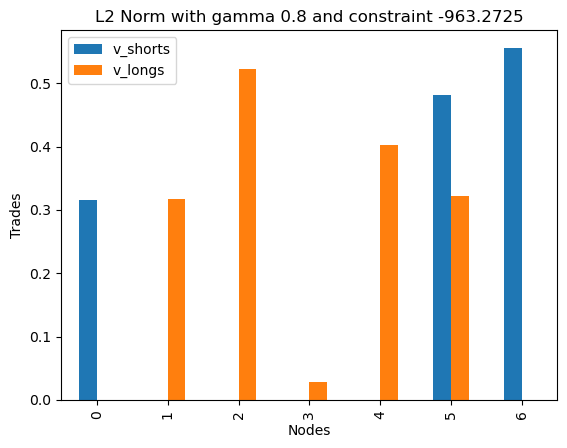

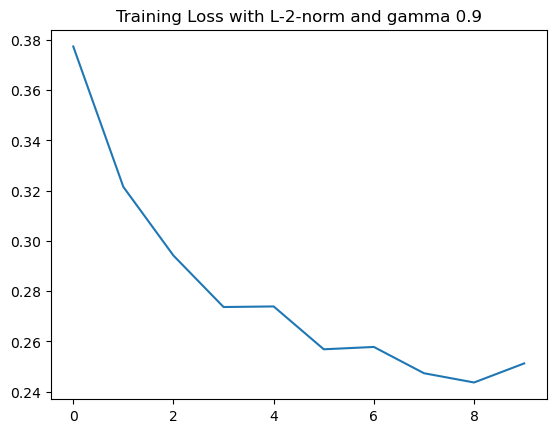

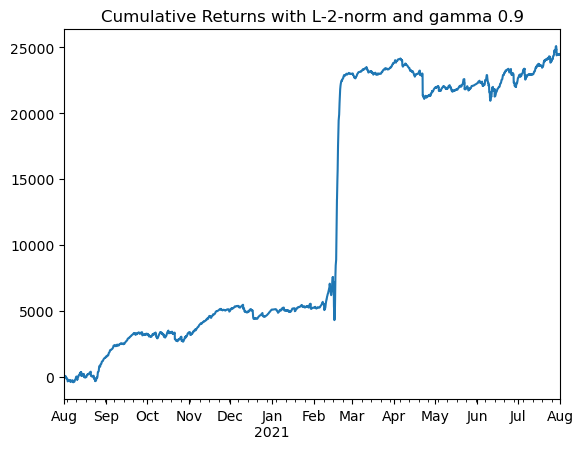

Portfolio returns 20489.637262
constraint -1086.868622


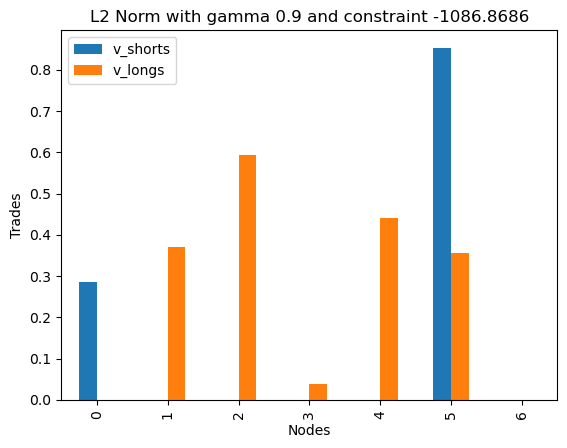

In [4]:

L_vals = np.arange(0.1,1,0.1)#[0.1, 0.5, 0.8]
L_norms = [1,2]
pd_dict={}
worst_loss_list = np.empty((len(L_norms), len(L_vals)))
total_return_list = []
for l_norm in L_norms:
    for k, L_val in enumerate(L_vals):
        nodes = 7
        volume_short = np.zeros((len(L_vals), nodes))
        volume_long = np.zeros((len(L_vals), nodes))
        net = create_model(gamma= L_val, l_norm=l_norm)
        optimizer = torch.optim.RMSprop(net.parameters(), lr=1e-3, weight_decay=0)

        print(net)

        avg_loss = []

        NUM_EPOCHS = 10  # The model is very slow to train
        NUM_BATCHES = 35

        for epoch in tqdm(range(NUM_EPOCHS)):
            running_sum = 0
            for batch in range(NUM_BATCHES):
                running_sum += net.train_step(optimizer, 32, da_train.values.T, 24, 24)
            avg_loss.append(running_sum / NUM_BATCHES)

        plt.figure()
        plt.plot(avg_loss)
        plt.title('Training Loss with L-{}-norm and gamma {}'.format(l_norm, round(L_val,4)))
        plt.show()

        v_long, bid, v_short, offer = net.predict(X_validate, da, da_validate, rt_validate)
        results = hourly_results(v_long, bid.values, v_short, offer.values, da_validate, rt_validate)
        pnl = results.sum(axis=1).cumsum()
        pnl.plot()
        plt.title('Cumulative Returns with L-{}-norm and gamma {}'.format(l_norm, round(L_val,4)))
        plt.show()
        portfolio_rets = bid.dot(v_long)+ offer.dot(v_short)
        constraint = worst_loss(results)
        print('Portfolio returns',np.sum(portfolio_rets))
        print('constraint',constraint)
        portfolio_rets = bid.dot(v_long)+ offer.dot(v_short)
        for i in range(nodes):
            volume_long[k, :] = v_long
            volume_short[k, :] = v_short
            pd_dict[l_norm, k] = pd.DataFrame({"gamma": f"{round(L_vals[k],4)}",
                            "v_shorts":v_long,
                            "v_longs":v_short})
            pd_dict[l_norm,k]['L_norm'] = f"L{l_norm}"
            #cum_return = np.sum(portfolio_rets)[0]
            #print('cum_return', cum_return)
        pd_dict[l_norm,k]['PTF_Return'] = np.sum(portfolio_rets)
        pd_dict[l_norm,k]['Worst_Return'] = constraint
        pd_dict[l_norm,k].loc[:, :'L_norm'].plot(kind="bar")
        plt.title("L{} Norm with gamma {} and constraint {}".format(l_norm,pd_dict[l_norm,k]['gamma'][0], round(pd_dict[l_norm,k]['Worst_Return'][0],4)) )
        plt.xlabel("Nodes")
        plt.ylabel("Trades")
        #worst_loss_list[l_norm, k] = constraint
        #total_return_list[l_norm, k] = cum_return

In [7]:
pd_dict

{(1,
  0):   gamma  v_shorts  v_longs L_norm  PTF_Return  Worst_Return
 0   0.1       0.0      0.0     L1    1661.548       -60.414
 1   0.1       0.0      0.0     L1    1661.548       -60.414
 2   0.1       0.0      0.1     L1    1661.548       -60.414
 3   0.1       0.0      0.0     L1    1661.548       -60.414
 4   0.1       0.0      0.0     L1    1661.548       -60.414
 5   0.1       0.0      0.0     L1    1661.548       -60.414
 6   0.1       0.1      0.0     L1    1661.548       -60.414,
 (1,
  1):   gamma  v_shorts  v_longs L_norm  PTF_Return  Worst_Return
 0   0.2       0.0      0.0     L1    2552.016      -120.828
 1   0.2       0.0      0.0     L1    2552.016      -120.828
 2   0.2       0.0      0.2     L1    2552.016      -120.828
 3   0.2       0.0      0.0     L1    2552.016      -120.828
 4   0.2       0.0      0.0     L1    2552.016      -120.828
 5   0.2       0.2      0.0     L1    2552.016      -120.828
 6   0.2       0.0      0.0     L1    2552.016      -120.828,
 (

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('C:/Users/A30010587/Downloads/cwp_interview/cwp_interview/'))
if module_path not in sys.path:
    sys.path.append(module_path)


import torch
import numpy as np
from typing import Optional, Dict, Any
import torch
import torch.nn as nn
from utils import TimeseriesDataset, NormalizationIdentity, NormalizationStandardization, _split_series_time_dims, _merge_series_time_dims, _easy_mlp, device
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cvxpy as cp
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("Question2.csv", index_col=0, header=[0,1], parse_dates=True)

da = data["da"]
rt = data["rt"]
X = data["X"]

# example of prices with a two day lag if you wish to use timeseries as features (ie RNN, CNN, ARIMA, etc...)
shifted_da = da.shift(freq="48H")
shifted_rt = rt.shift(freq="48H")

split = datetime(2020,8,1)

X_train = X.loc[:split]
X_validate = X.loc[split:]

da_train = da.loc[:split]
da_validate = da.loc[split:]

rt_train = rt.loc[:split]
rt_validate = rt.loc[split:]

print('\nVerify NaN values')
print('X_train',X_train.isnull().values.any())
print('Nan index in X_train',X_train.isnull().values.any(1).nonzero()[0])
X_train.fillna(X_train.median(), inplace = True)
print('X_train',X_train.isnull().values.any())
print('X_validate',X_validate.isnull().values.any())
print('da_train',da_train.isnull().values.any())
print('da_validate',da_validate.isnull().values.any())
print('rt_train',rt_train.isnull().values.any())
print('rt_validate',rt_validate.isnull().values.any())




Verify NaN values
X_train True
Nan index in X_train [10468]
X_train False
X_validate False
da_train False
da_validate False
rt_train False
rt_validate False


Transformer Model

In [2]:
from Model import TradingBot
from utils import hourly_results, worst_loss
def create_model(gamma:float, l_norm:int):
    net = TradingBot(
        num_series=100,
        input_dim = 12,
        gamma = gamma,
        l_norm = l_norm,
        data_normalization="standardization",
        loss_normalization="series",
        series_embedding_dim=13,
        input_encoder_layers=3,
        input_encoding_normalization=True,
        encoder= {
            "attention_layers":3,
            "attention_heads": 3,
            "attention_dim": 4,
            "attention_feedforward_dim": 12,
        },
        quantile_decoder={
             "min_u": 0.01,
             "max_u": 0.99,
            "attentional_quantile": {
                "attention_heads": 3,
                "attention_layers": 3,
                "attention_dim": 12,
                "mlp_layers": 3,
                "mlp_dim": 16,
                "resolution": 50,
            },
        }
    )
    return net.to(device)

TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_features=36, bias=True)
      (key_creators): ModuleLi

100%|██████████| 10/10 [01:47<00:00, 10.76s/it]


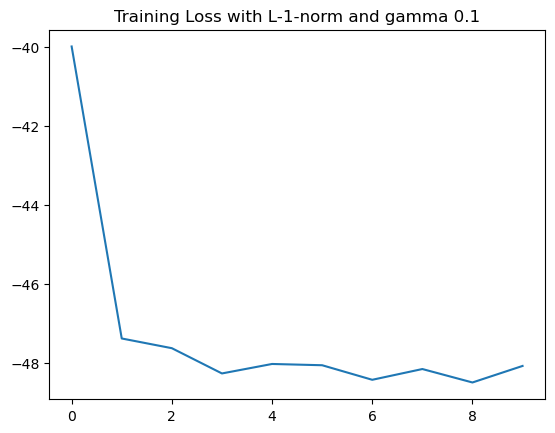

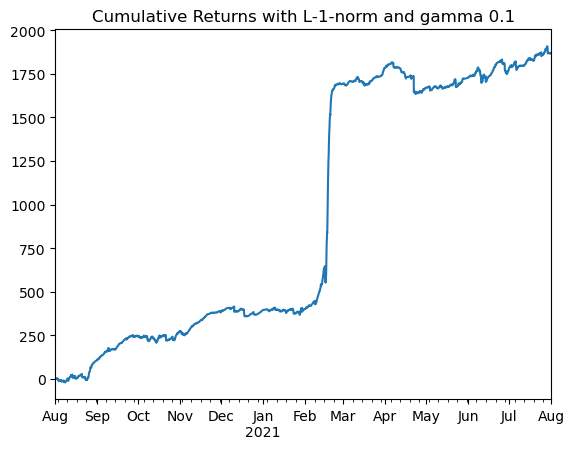

Portfolio returns 1482.8760000000002
constraint -60.414
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, ou

100%|██████████| 10/10 [01:50<00:00, 11.06s/it]


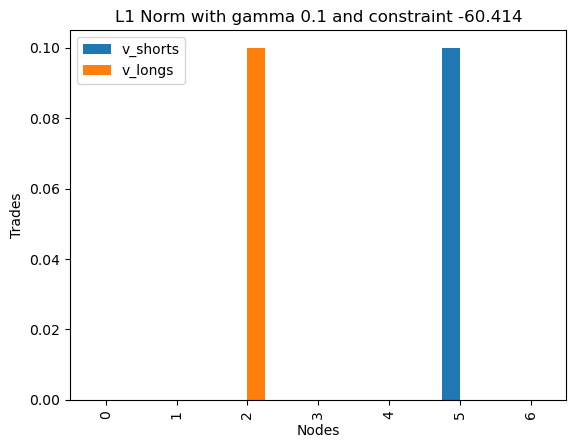

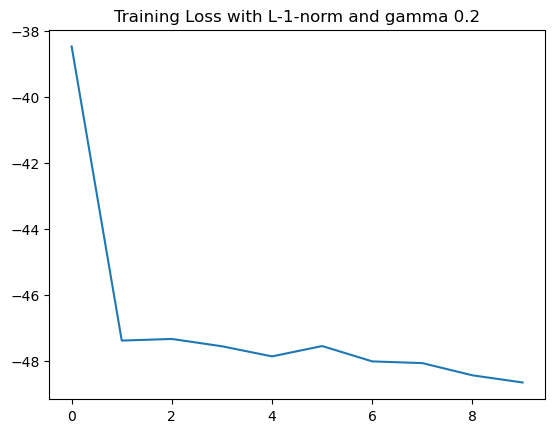

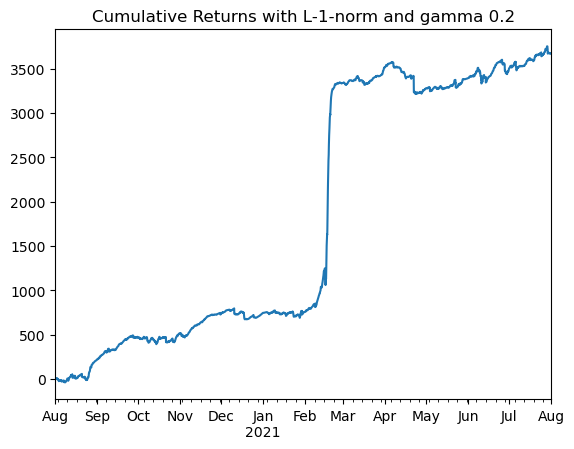

Portfolio returns 2953.996
constraint -120.828
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_feature

100%|██████████| 10/10 [01:51<00:00, 11.13s/it]


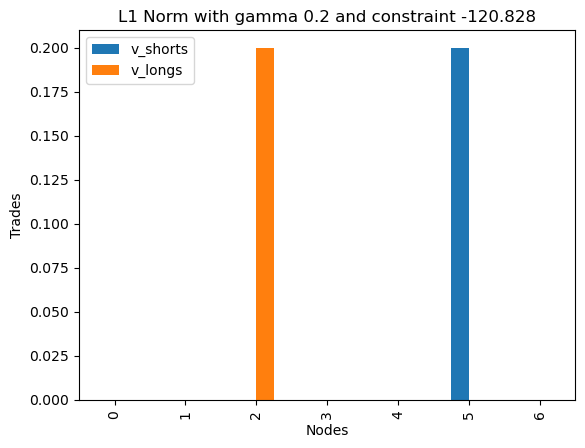

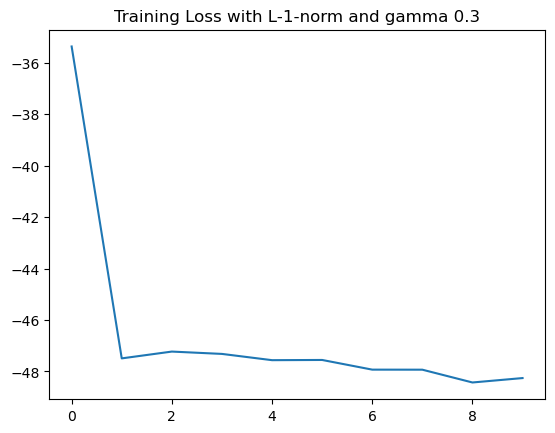

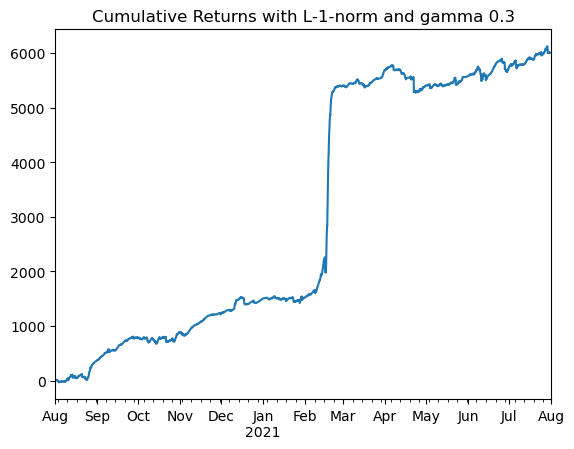

Portfolio returns 4638.942
constraint -181.242
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_feature

100%|██████████| 10/10 [01:48<00:00, 10.81s/it]


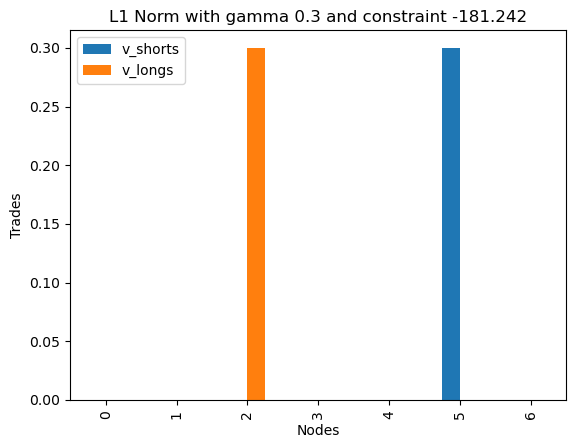

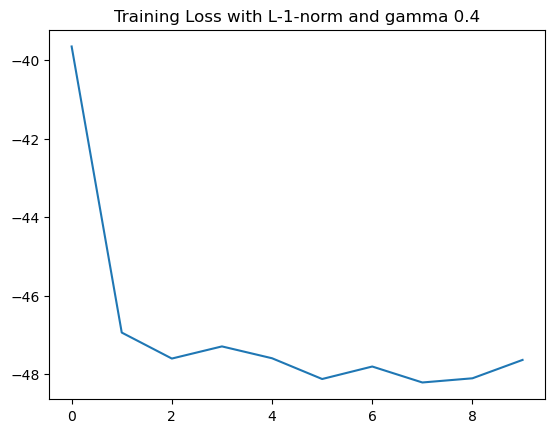

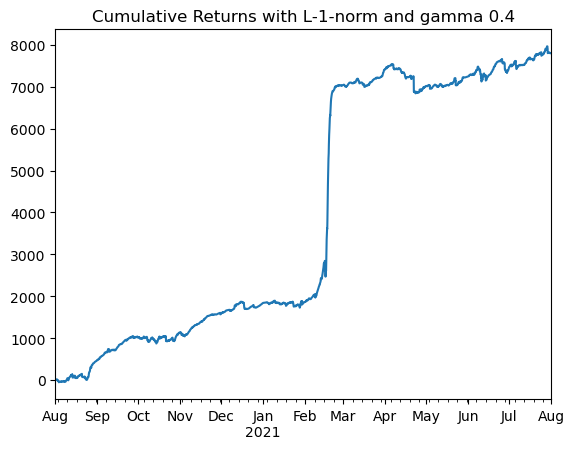

Portfolio returns 6195.336000000001
constraint -241.656
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, ou

100%|██████████| 10/10 [01:48<00:00, 10.87s/it]


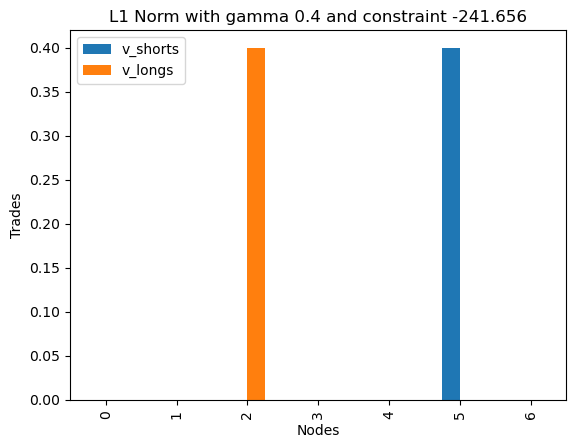

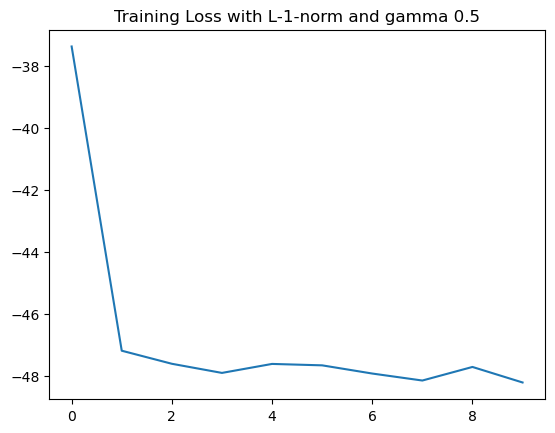

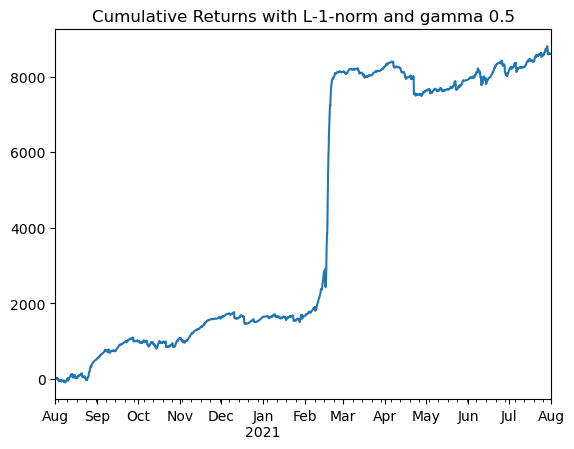

Portfolio returns 5552.62
constraint -302.07
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_features=

100%|██████████| 10/10 [01:50<00:00, 11.09s/it]


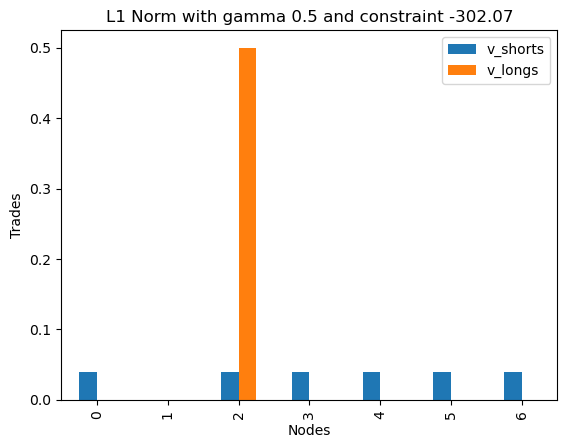

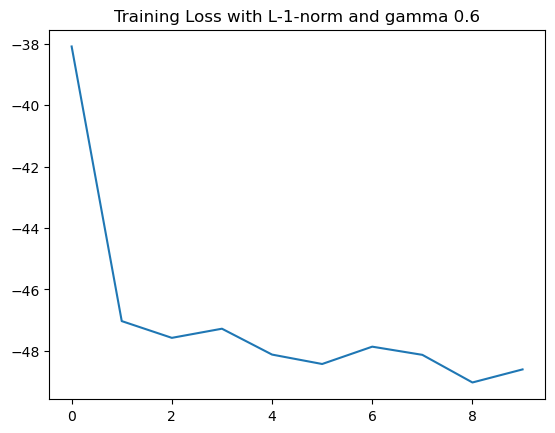

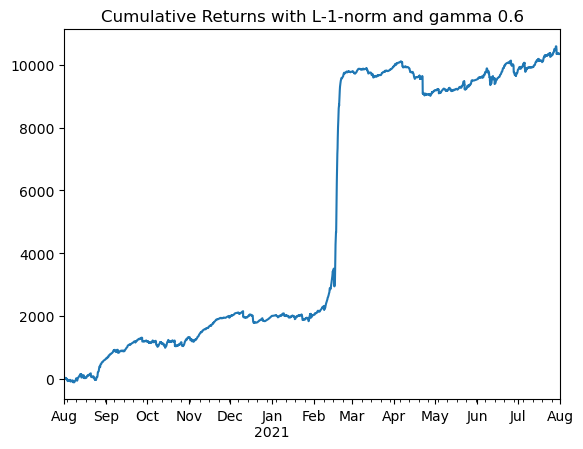

Portfolio returns 8547.198
constraint -362.484
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_feature

100%|██████████| 10/10 [01:57<00:00, 11.72s/it]


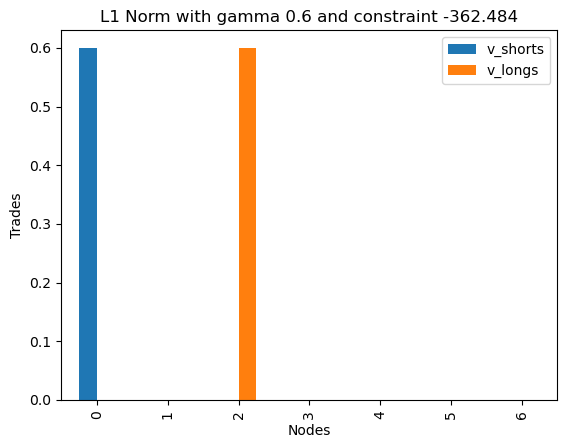

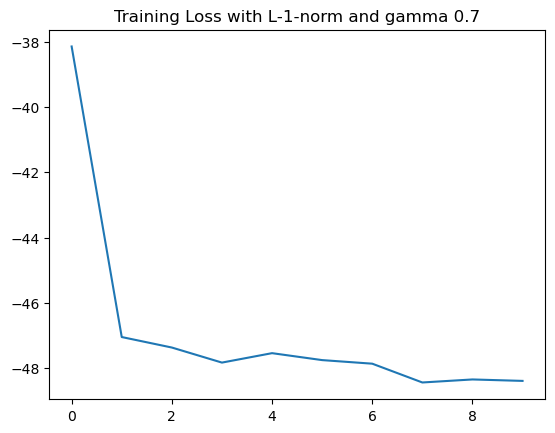

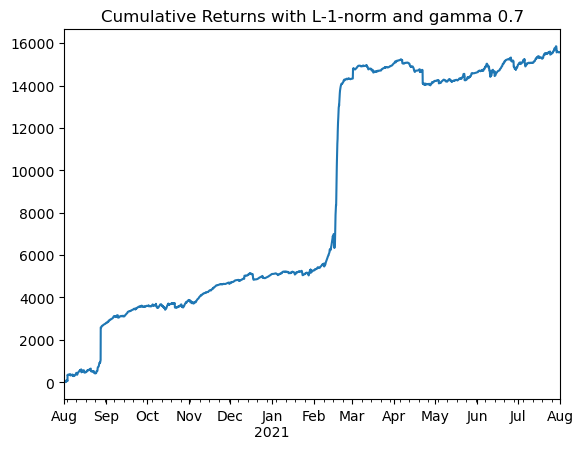

Portfolio returns 10681.838999999998
constraint -422.89799999999997
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_fea

100%|██████████| 10/10 [01:49<00:00, 10.91s/it]


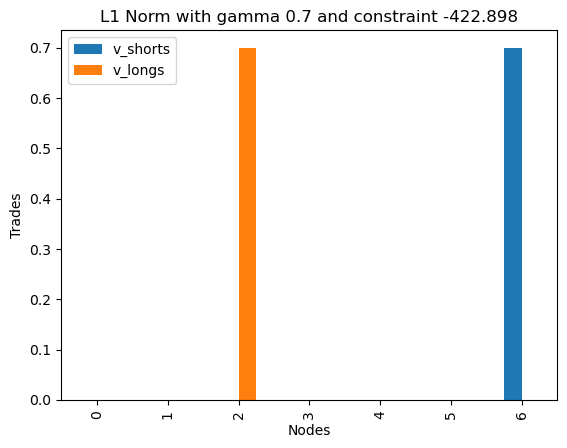

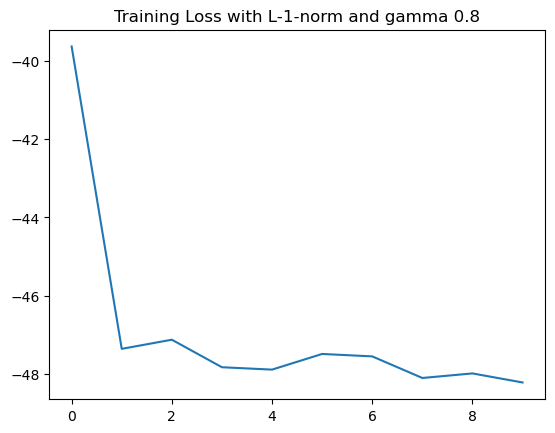

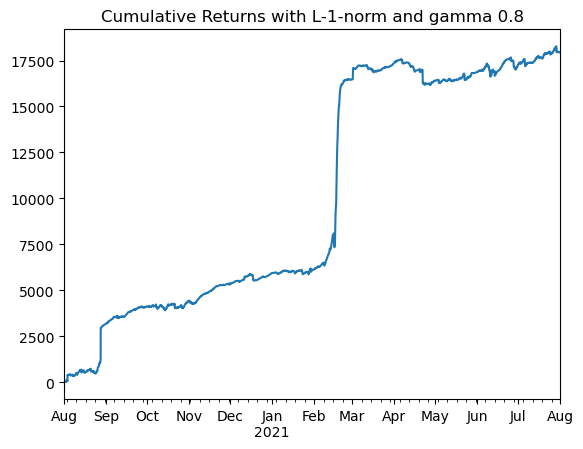

Portfolio returns 12295.184000000003
constraint -483.312
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, o

100%|██████████| 10/10 [01:51<00:00, 11.19s/it]


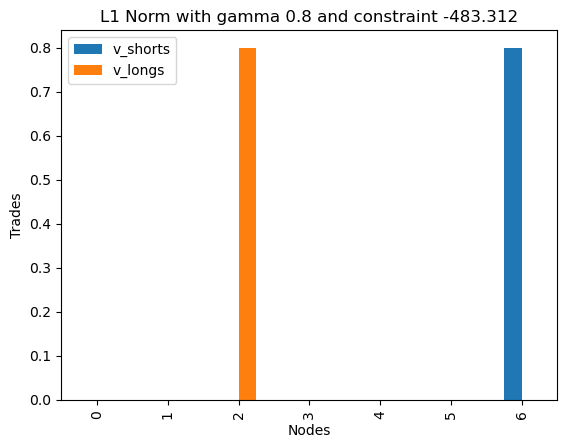

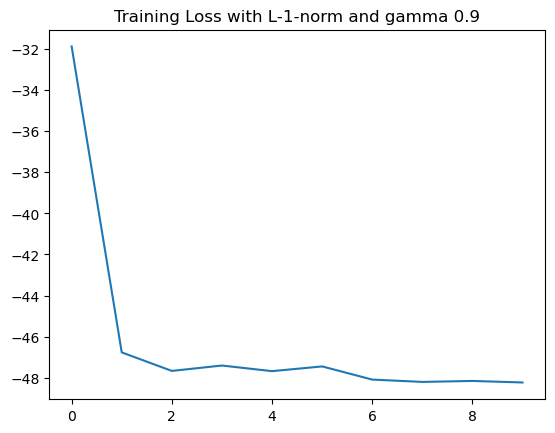

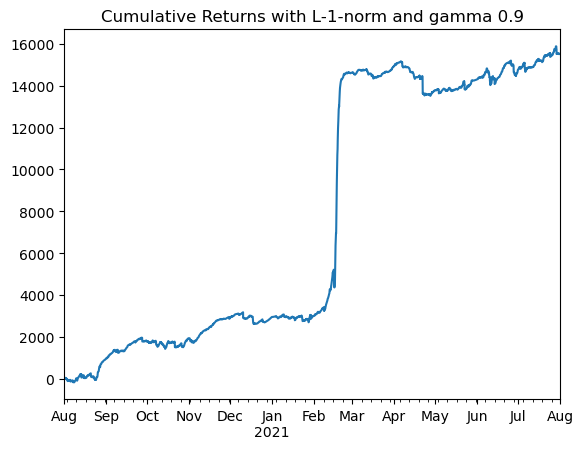

Portfolio returns 11095.839
constraint -543.726
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_featur

100%|██████████| 10/10 [01:41<00:00, 10.15s/it]


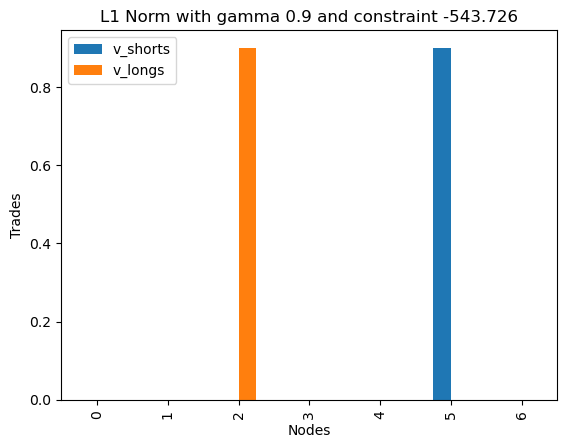

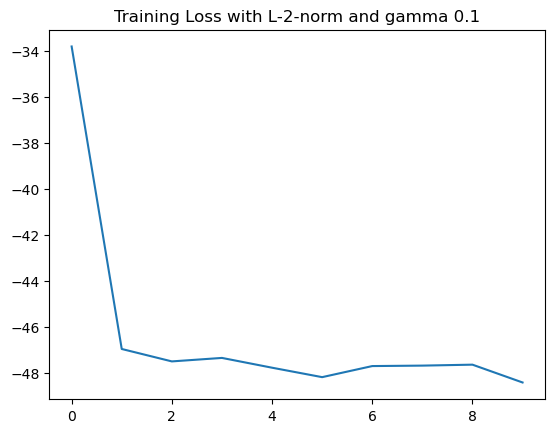

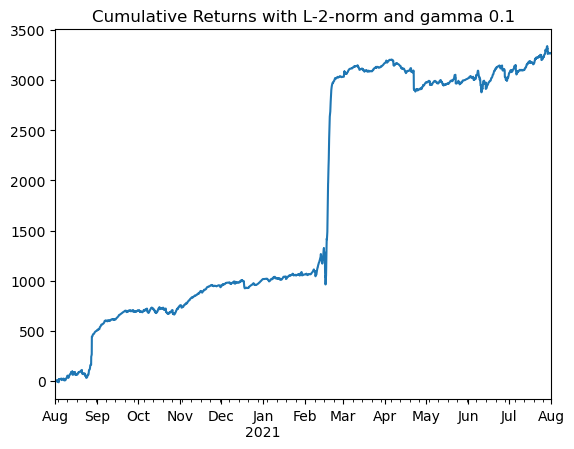

Portfolio returns 2477.3267080000005
constraint -121.110518
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12

100%|██████████| 10/10 [01:57<00:00, 11.78s/it]


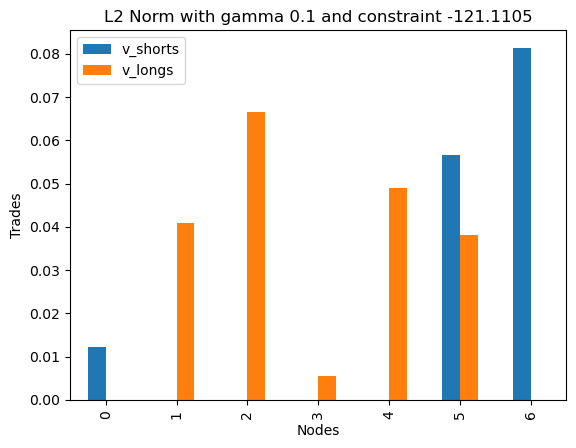

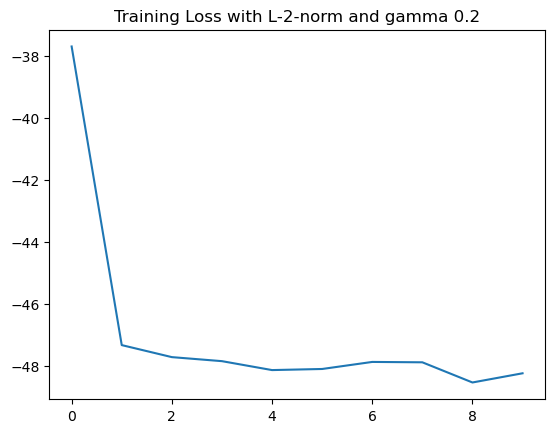

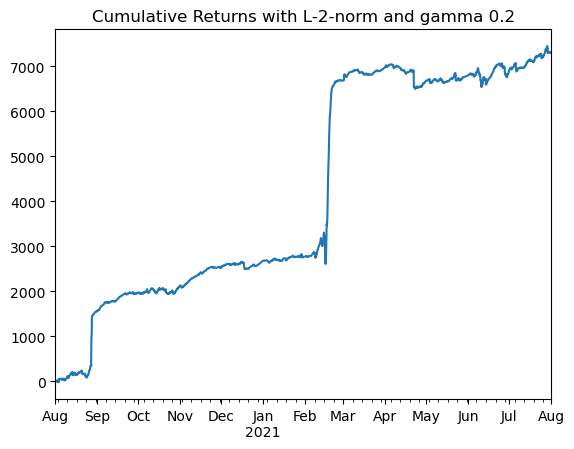

Portfolio returns 5439.109566
constraint -243.329571
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_f

100%|██████████| 10/10 [01:44<00:00, 10.44s/it]


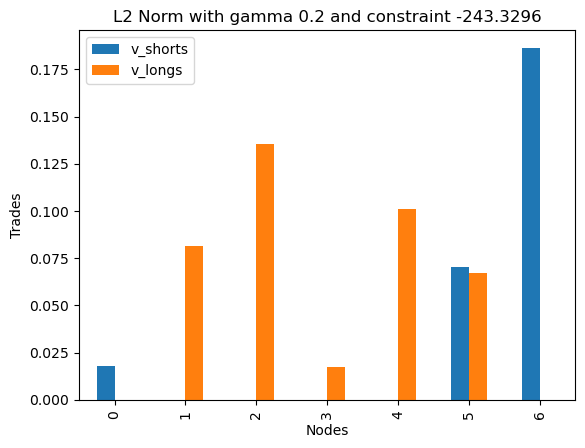

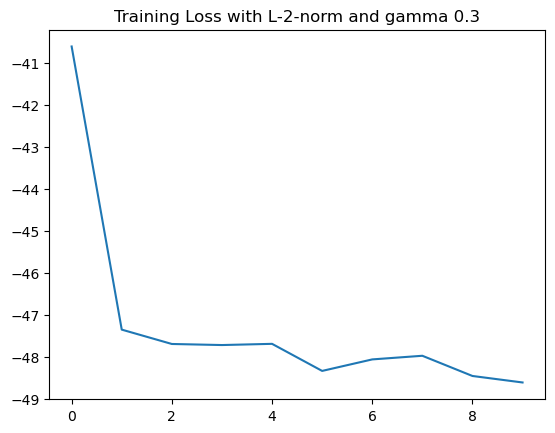

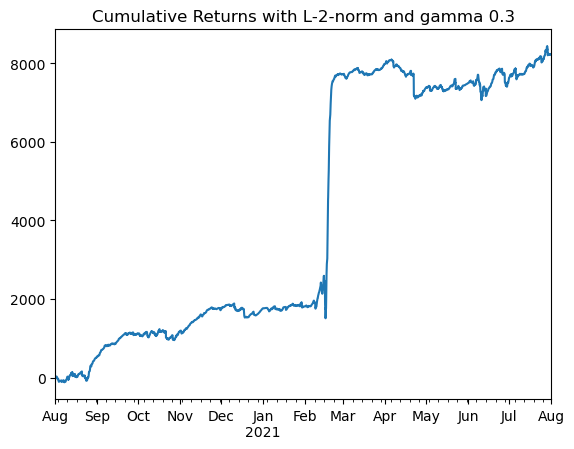

Portfolio returns 6910.802009999999
constraint -361.860883
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12,

100%|██████████| 10/10 [01:52<00:00, 11.24s/it]


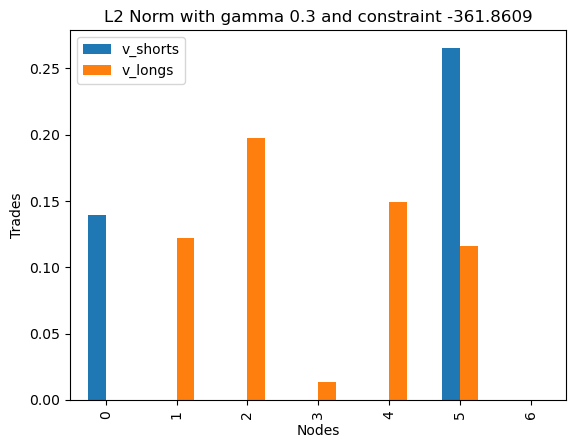

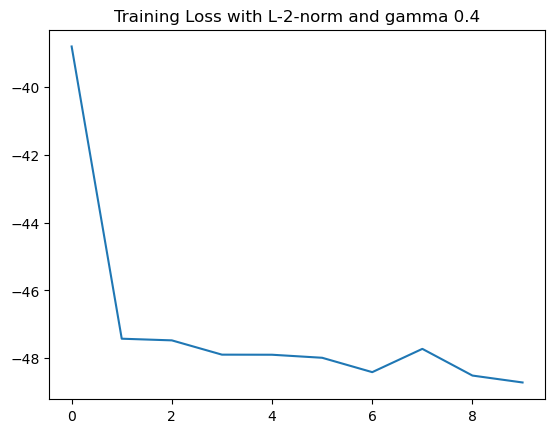

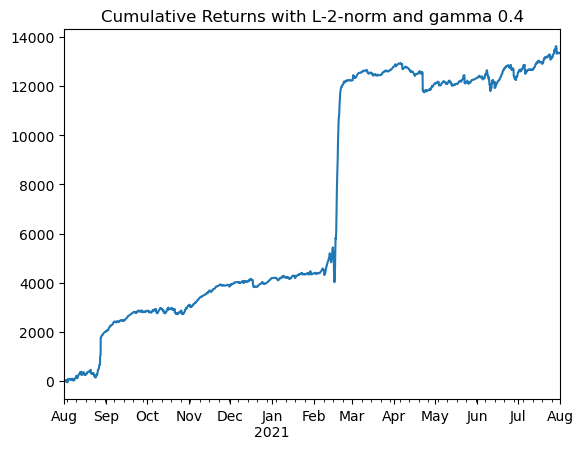

Portfolio returns 9878.007357
constraint -485.23682899999994
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=1

100%|██████████| 10/10 [02:04<00:00, 12.47s/it]


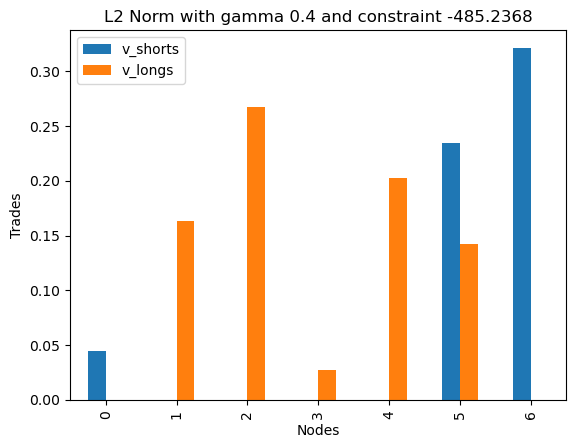

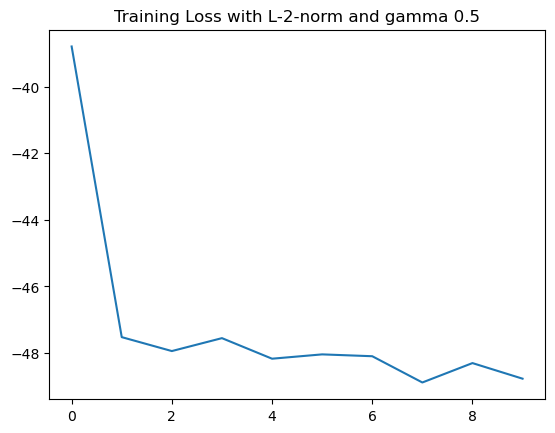

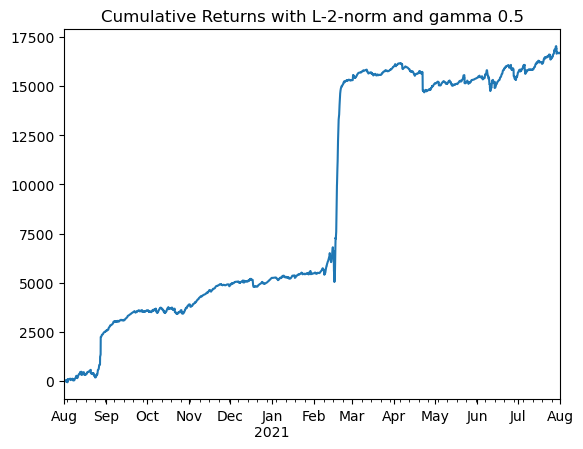

Portfolio returns 12321.02933
constraint -606.284833
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_f

100%|██████████| 10/10 [01:55<00:00, 11.54s/it]


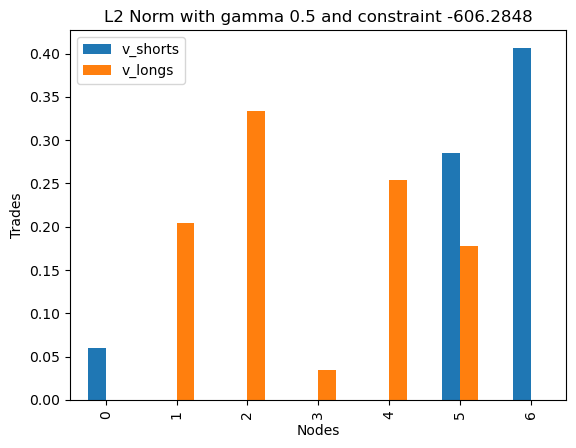

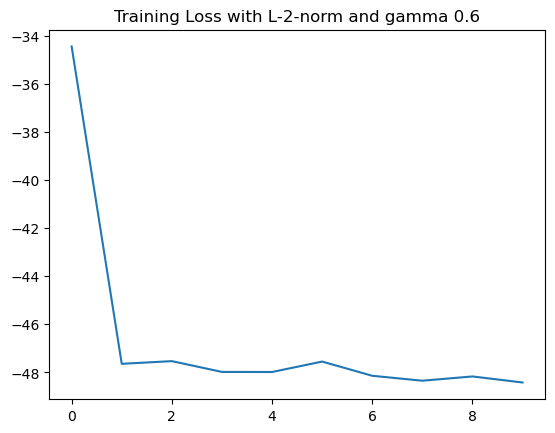

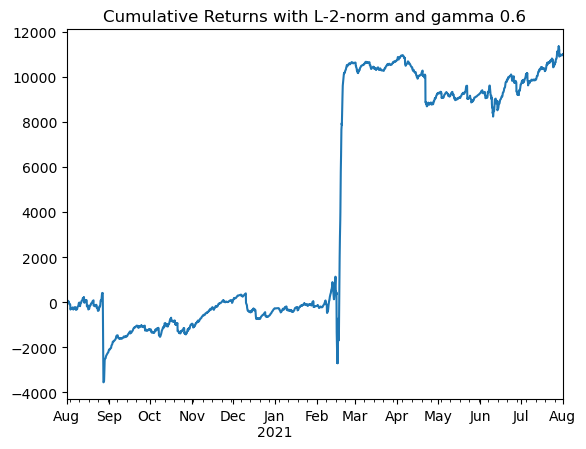

Portfolio returns 11637.942523999998
constraint -783.873706
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12

100%|██████████| 10/10 [02:02<00:00, 12.20s/it]


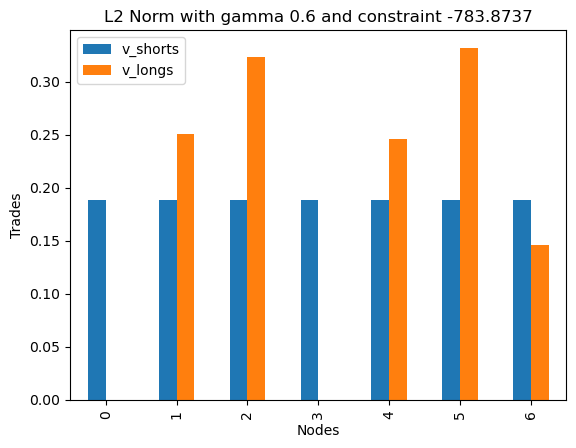

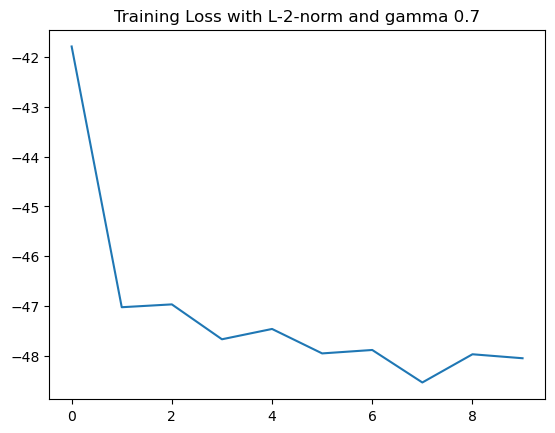

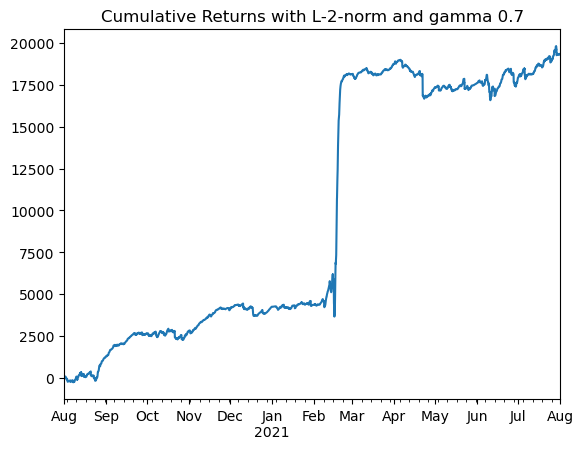

Portfolio returns 16283.629535
constraint -847.9218390000001
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=1

100%|██████████| 10/10 [01:52<00:00, 11.21s/it]


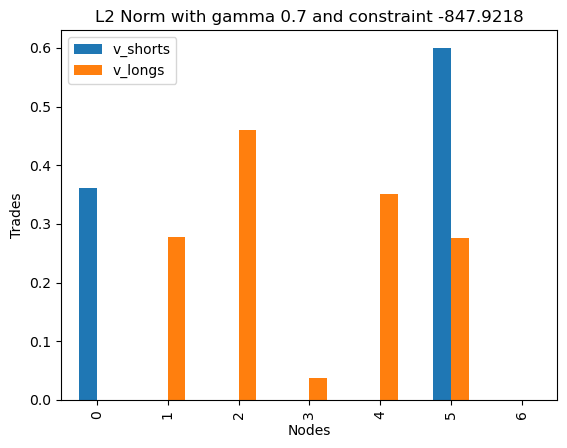

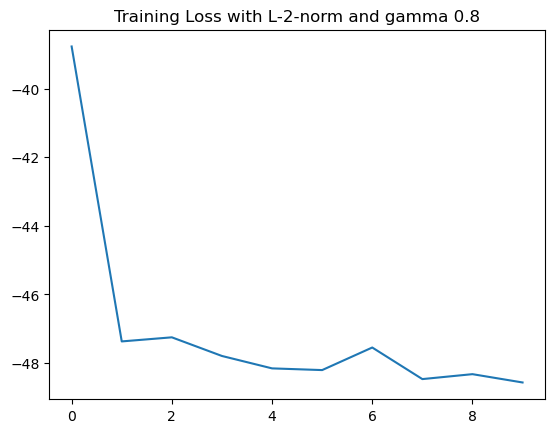

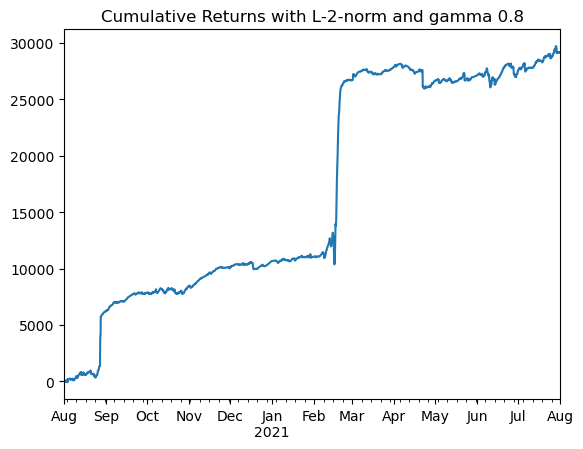

Portfolio returns 21892.462637
constraint -974.9186680000001
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=1

100%|██████████| 10/10 [01:55<00:00, 11.52s/it]


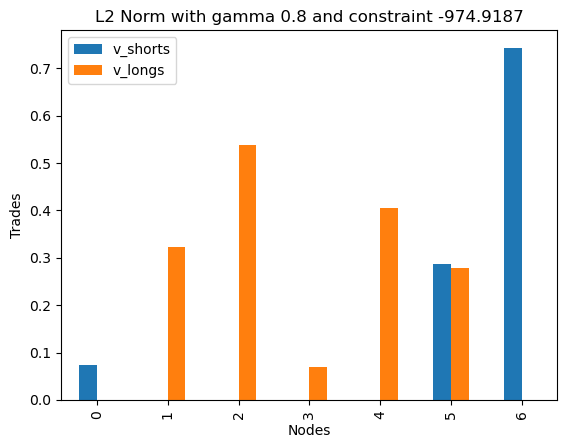

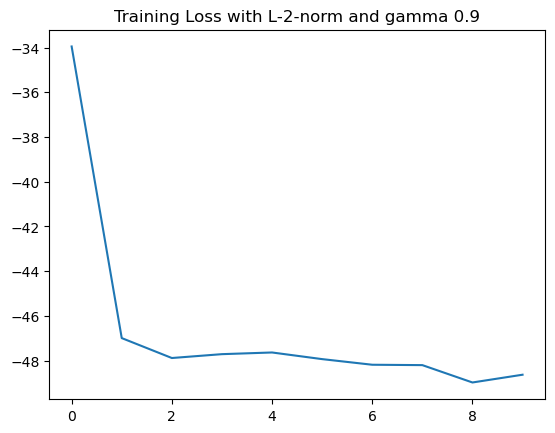

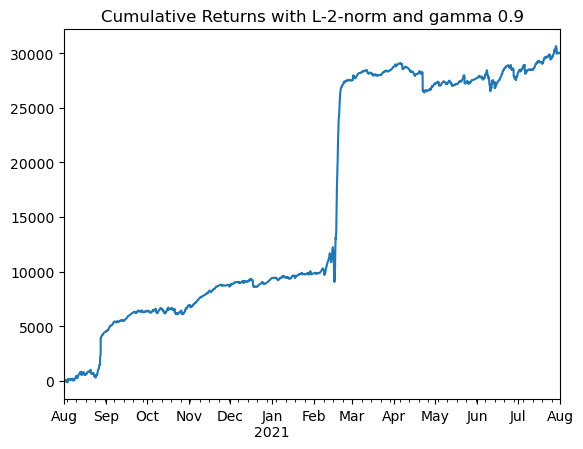

Portfolio returns 22163.885316999997
constraint -1092.909985


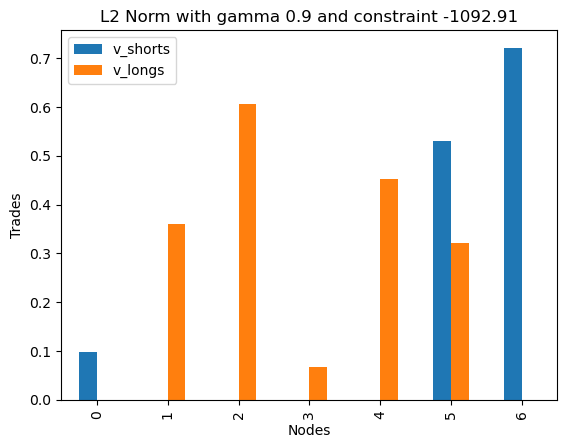

In [3]:

L_vals = np.arange(0.1,1,0.1)#[0.1, 0.5, 0.8]
L_norms = [1,2]
pd_dict={}
worst_loss_list = np.empty((len(L_norms), len(L_vals)))
total_return_list = []
for l_norm in L_norms:
    for k, L_val in enumerate(L_vals):
        nodes = 7
        volume_short = np.zeros((len(L_vals), nodes))
        volume_long = np.zeros((len(L_vals), nodes))
        net = create_model(gamma= L_val, l_norm=l_norm)
        optimizer = torch.optim.RMSprop(net.parameters(), lr=1e-3, weight_decay=0)

        print(net)

        avg_loss = []

        NUM_EPOCHS = 10  # The model is very slow to train
        NUM_BATCHES = 35

        for epoch in tqdm(range(NUM_EPOCHS)):
            running_sum = 0
            for batch in range(NUM_BATCHES):
                running_sum += net.train_step(optimizer, 32, da_train.values.T, 24, 24)
            avg_loss.append(running_sum / NUM_BATCHES)

        plt.figure()
        plt.plot(avg_loss)
        plt.title('Training Loss with L-{}-norm and gamma {}'.format(l_norm, round(L_val,4)))
        plt.show()

        v_long, bid, v_short, offer = net.predict(X_validate, da, da_validate, rt_validate)
        results = hourly_results(v_long, bid.values, v_short, offer.values, da_validate, rt_validate)
        pnl = results.sum(axis=1).cumsum()
        pnl.plot()
        plt.title('Cumulative Returns with L-{}-norm and gamma {}'.format(l_norm, round(L_val,4)))
        plt.show()
        portfolio_rets = bid.dot(v_long)+ offer.dot(v_short)
        constraint = worst_loss(results)
        print('Portfolio returns',np.sum(portfolio_rets))
        print('constraint',constraint)
        portfolio_rets = bid.dot(v_long)+ offer.dot(v_short)
        for i in range(nodes):
            volume_long[k, :] = v_long
            volume_short[k, :] = v_short
            pd_dict[l_norm, k] = pd.DataFrame({"gamma": f"{round(L_vals[k],4)}",
                            "v_shorts":v_long,
                            "v_longs":v_short})
            pd_dict[l_norm,k]['L_norm'] = f"L{l_norm}"
            #cum_return = np.sum(portfolio_rets)[0]
            #print('cum_return', cum_return)
        pd_dict[l_norm,k]['PTF_Return'] = np.sum(portfolio_rets)
        pd_dict[l_norm,k]['Worst_Return'] = constraint
        pd_dict[l_norm,k].loc[:, :'L_norm'].plot(kind="bar")
        plt.title("L{} Norm with gamma {} and constraint {}".format(l_norm,pd_dict[l_norm,k]['gamma'][0], round(pd_dict[l_norm,k]['Worst_Return'][0],4)) )
        plt.xlabel("Nodes")
        plt.ylabel("Trades")
        #worst_loss_list[l_norm, k] = constraint
        #total_return_list[l_norm, k] = cum_return